# **LOAN LENDING CASE STUDY**

In [149]:
#importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
#loading the dataset 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
#Reading the data
loan= pd.read_csv('/content/drive/MyDrive/Project /loan.csv')

<ipython-input-151-ba3fe4d91ec1>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan= pd.read_csv('/content/drive/MyDrive/Project /loan.csv')


In [152]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### **Data Cleaning**

In [153]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [154]:
#list of columns in the dataset
loan.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [155]:
#calculating the null values
loan.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [156]:
(loan.isna().sum()/len(loan.index))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [157]:
#Removing or Dropning the columns with all null values 
loan.dropna(axis = 1, how = 'all', inplace = True)
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [158]:
loan.shape

(39717, 57)

In [159]:
loan.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool

In [160]:
#Removing the columns with same values
loan.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [161]:
loan.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths'],
      dtype='object')

In [162]:
#Deleting the columns which have irrelvant data and are unnecessary for the analysis 
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv" , "total_pymnt_inv"] ,axis=1, inplace=True)
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,chargeoff_within_12_mths
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5863.155187,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.666844,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.890000,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.330000,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,2822.969293,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,9913.491822,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,5272.161128,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,5174.198551,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,NaN


In [163]:
loan.columns



Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'chargeoff_within_12_mths'],
      dtype='object')

In [164]:
#Removal of the columns which are post loan parameters
loan.drop(['delinq_2yrs','revol_bal','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','chargeoff_within_12_mths','mths_since_last_delinq','mths_since_last_record'], axis=1, inplace=True)
#(['delinq_2yrs','revol_bal','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','chargeoff_within_12_mths','mths_since_last_delinq','mths_since_last_record'
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [165]:
loan.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

In [166]:
(loan.isna().sum()/len(loan.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

In [167]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  purpose              39717 non-null  object 
 15  dti                  39717 non-null 

In [168]:
#Filtering the data with current loan status as there not helpful for the analysis 
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [169]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  dti                  38577 non-null 

In [170]:
print("Mode : " + loan.emp_length.mode()[0])
loan.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [171]:
import warnings
warnings.filterwarnings('ignore')

In [172]:
#Imputing values for Null values

In [173]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()

0

In [174]:
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()

0

In [175]:
loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : x.split('%')[0]))

In [176]:
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))

In [177]:
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [178]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


Checking the Outliers in the data 

<AxesSubplot:xlabel='annual_inc'>

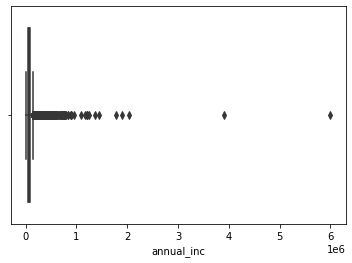

In [179]:
sns.boxplot(loan['annual_inc'])

In [180]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [181]:
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

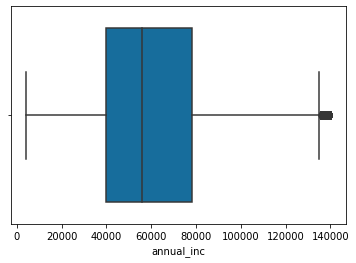

In [182]:
sns.boxplot(loan.annual_inc)

<AxesSubplot:xlabel='dti'>

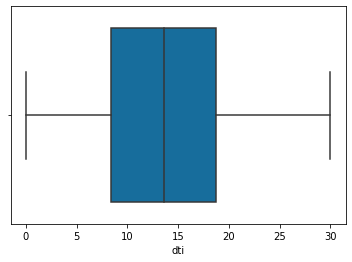

In [183]:
sns.boxplot(loan.dti)

<AxesSubplot:xlabel='loan_amnt'>

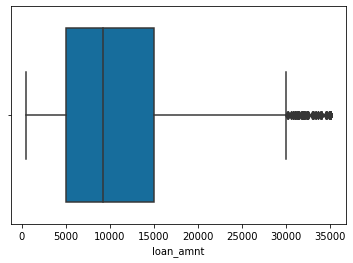

In [184]:
sns.boxplot(loan.loan_amnt)

In [185]:
loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

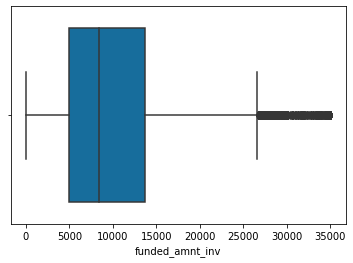

In [186]:
sns.boxplot(loan.funded_amnt_inv)

In [187]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

**DATA ANALYSIS**

Visualizing Categorical Data

<AxesSubplot:xlabel='loan_status', ylabel='count'>

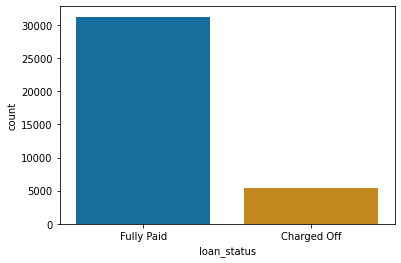

In [188]:
#subsetting the charged off loan status
sns.countplot(x = 'loan_status', data = loan)

In [189]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

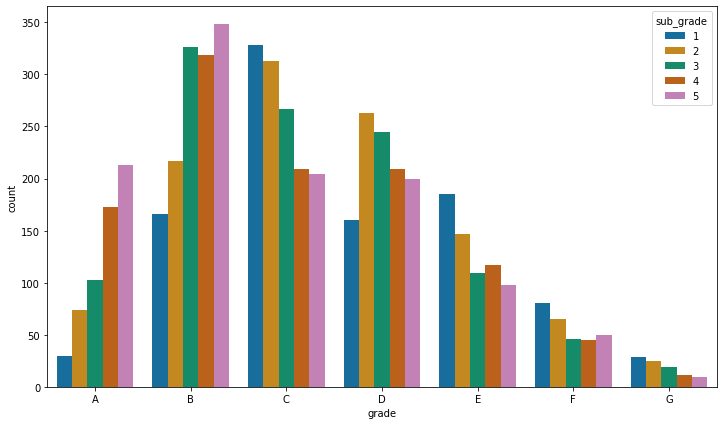

In [190]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

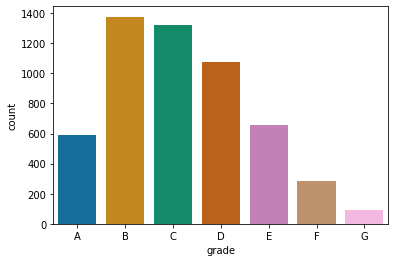

In [191]:
 sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [192]:
#checking unique values for home_ownership
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [193]:
#replacing 'NONE' with 'OTHERS'
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
#checking unique values for home_ownership again
loan['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

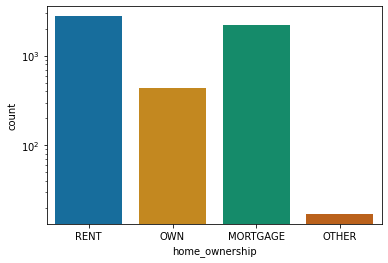

In [194]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='purpose'>

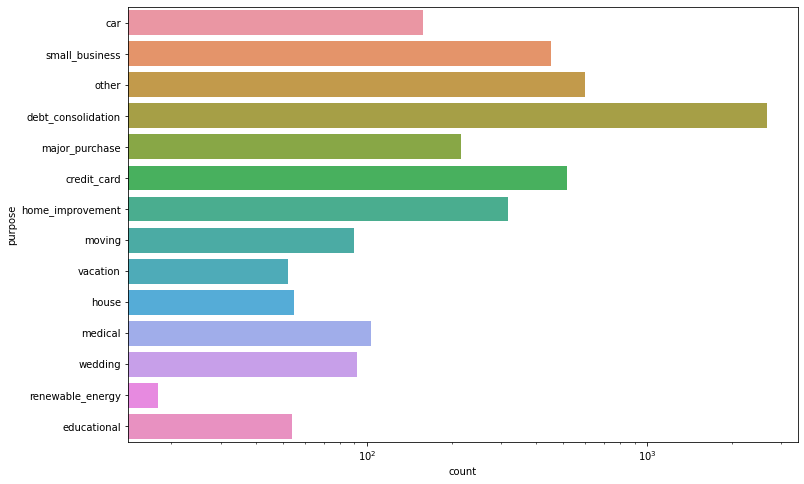

In [195]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])

Creating bins for some numerical variableS to make them categorical variables

In [196]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['revol_util_groups'] = pd.cut(loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
# Viewing new bins created
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


<AxesSubplot:xlabel='emp_length', ylabel='count'>

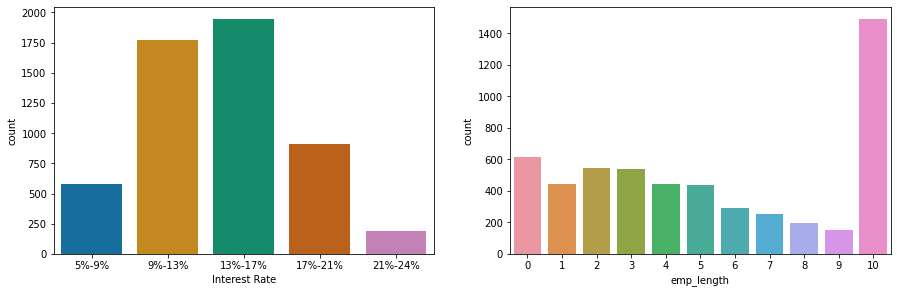

In [197]:
#Analyzing interest rate wrt the interest rate bins created
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

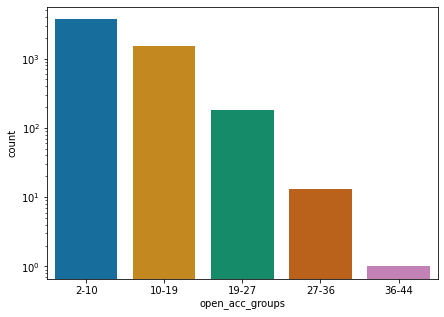

In [198]:
#analyzing open_acc,revol_util,total_acc,annual_inc
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

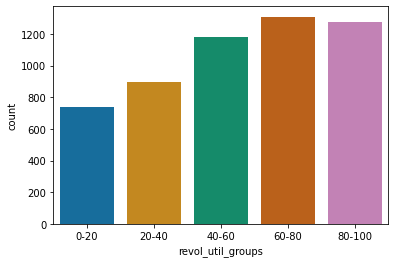

In [199]:
sns.countplot(x='revol_util_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

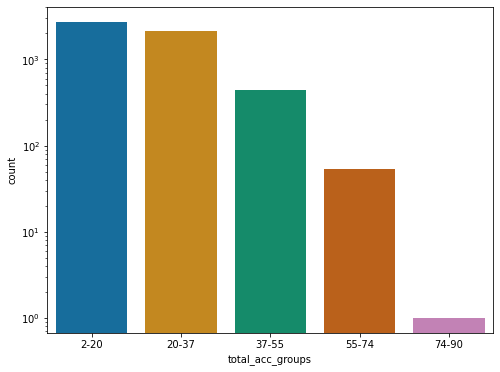

In [200]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

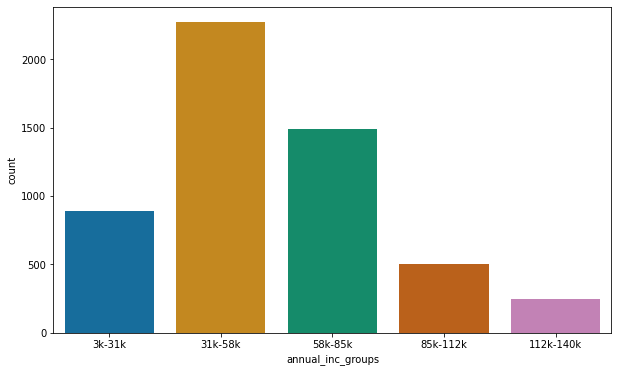

In [201]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

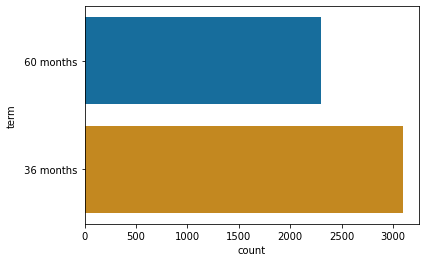

In [202]:
sns.countplot(y='term', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

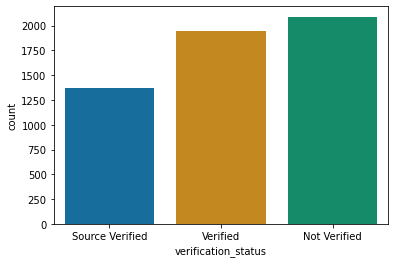

In [203]:

sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

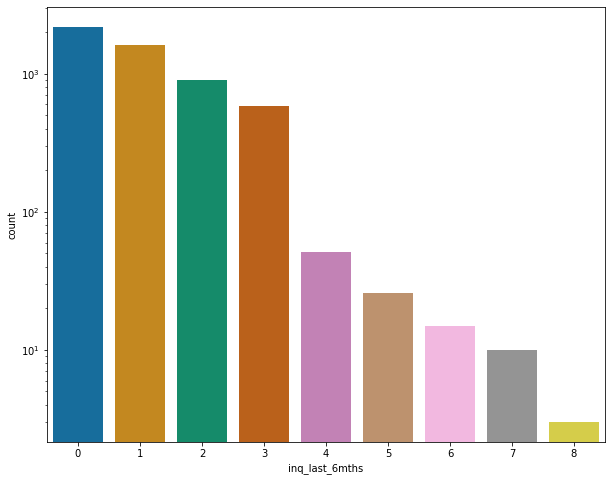

In [204]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

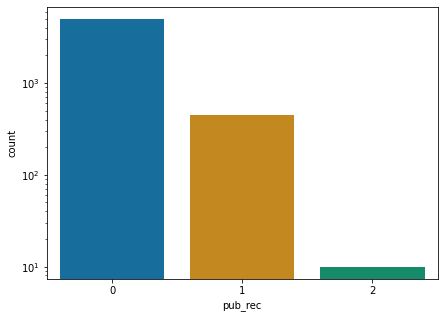

In [205]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan[loan['loan_status']=='Charged Off'])

Analysis using issued month and year

In [206]:
## Extracting month and year
df_month_year = loan['issue_d'].str.partition("-", True)     
loan['issue_month']=df_month_year[0]                       
loan['issue_year']='20' + df_month_year[2]

<AxesSubplot:xlabel='issue_year', ylabel='count'>

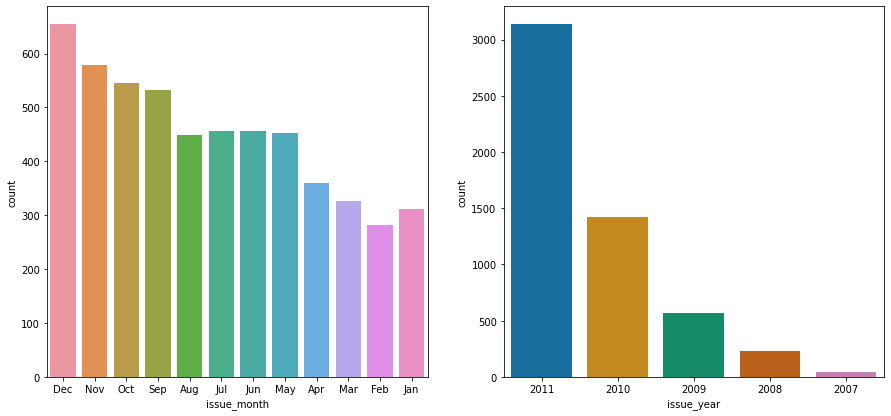

In [207]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'])
#Maximum number of defaults occured when the loan was sanctioned/issued in Dec.
#Loan issued in the year 2011 were also as compared to other years


In [208]:
#Analyzing installment,dti, loan_amnt
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

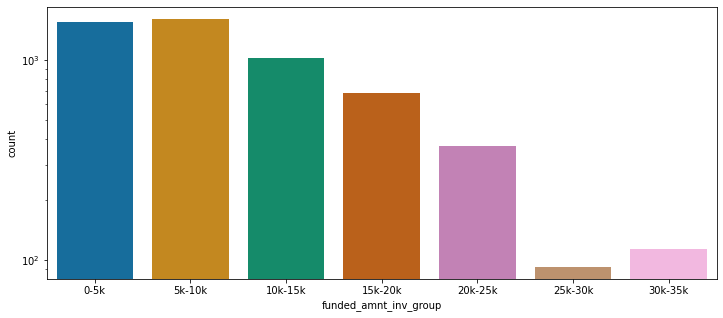

In [209]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

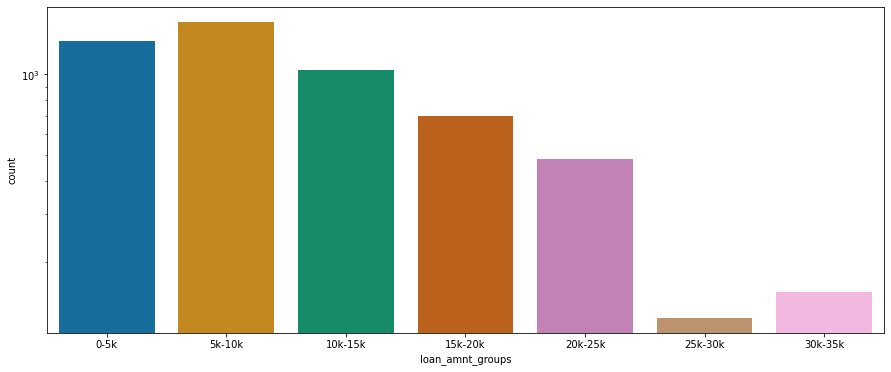

In [210]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

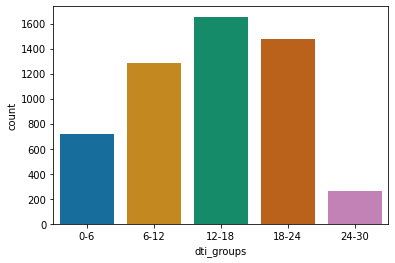

In [211]:
sns.countplot(x='dti_groups', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

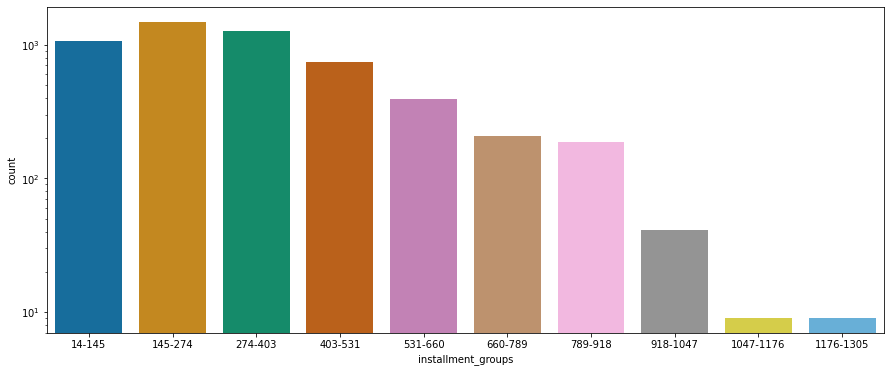

In [212]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])

Observations:

The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :
*   Applicants having house_ownership as 'RENT'
*   Applicants who use the loan to clear other debts
*   Applicants who receive interest at the rate of 13-17%
*   Applicants who have an income of range 31201 - 58402
*  Applicants who have 20-37 open_acc
* Applicants with employement length of 10
When funded amount by investor is between 5000-10000
*   Loan amount is between 5429 - 10357
Dti is between 12-18
*  When monthly installments are between 145-274
Term of 36 months
*  When the loan status is Not verified
*  When the purpose is 'debt_consolidation'
Grade is 'B' and a total grade of 'B5' level.
*   When the number of derogatory public records is 0
*   When the no of enquiries in last 6 months is 0














***Annual income with other columns***


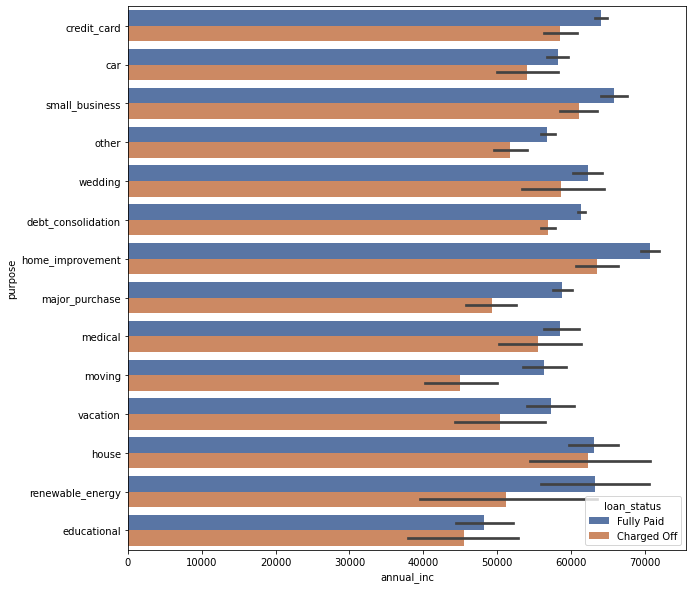

In [213]:
#PLotting Annual income and loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

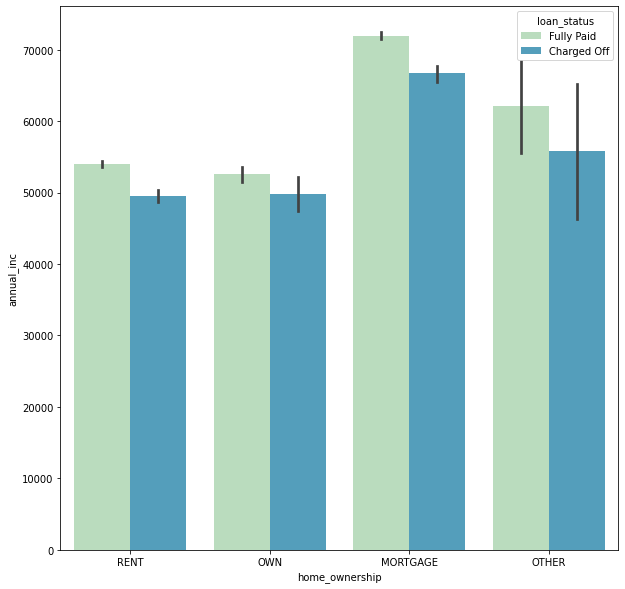

In [214]:
#Plotting annual income and home ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="GnBu")
plt.show()

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

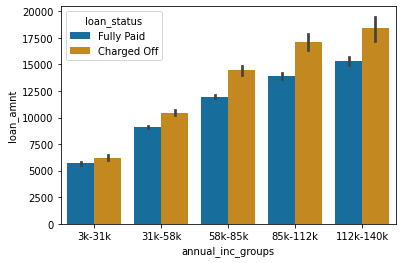

In [215]:
#Annual Income vs Loan amount
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan)

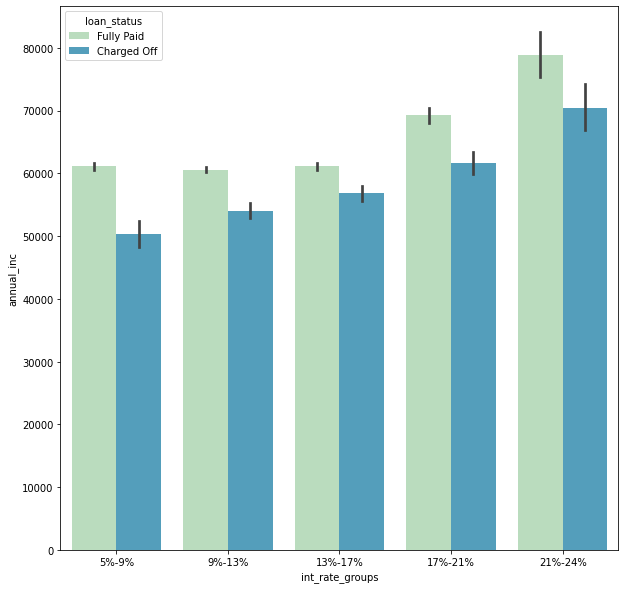

In [216]:
#Annual income vs int_rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="GnBu")
plt.show()

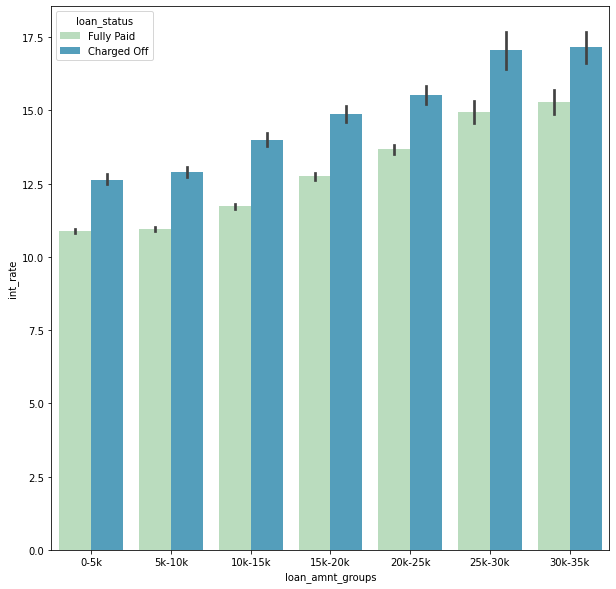

In [217]:
#Plotting Loan Amount and Interest Rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="GnBu")
plt.show()

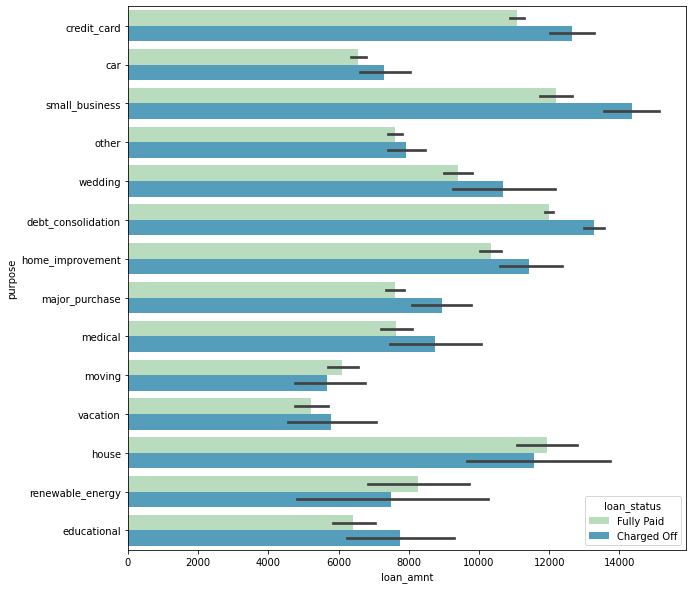

In [218]:
#Loan vs Loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='purpose', hue ='loan_status',palette="GnBu")
plt.show()


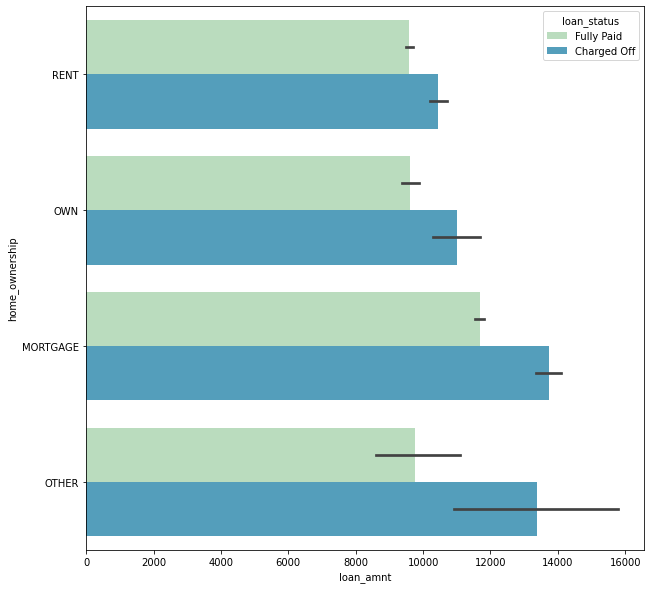

In [219]:
#Loan vs House Ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="GnBu")
plt.show()

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

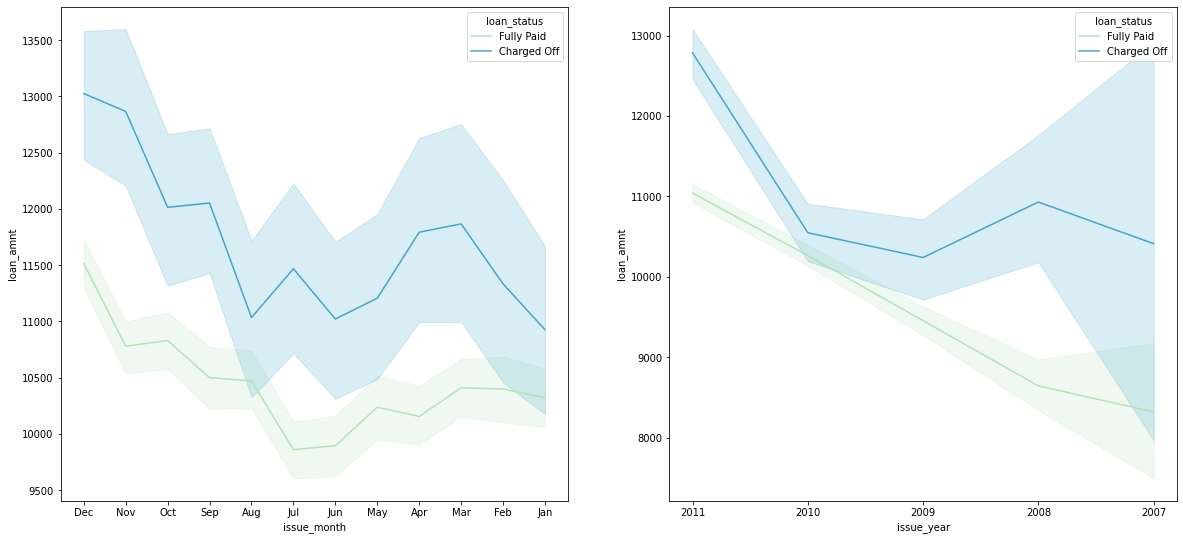

In [220]:
#Loan amount vs month issued and year issued
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan,y='loan_amnt', x='issue_month', hue ='loan_status',palette="GnBu")
plt.subplot(222)
sns.lineplot(data =loan,y='loan_amnt', x='issue_year', hue ='loan_status',palette="GnBu")

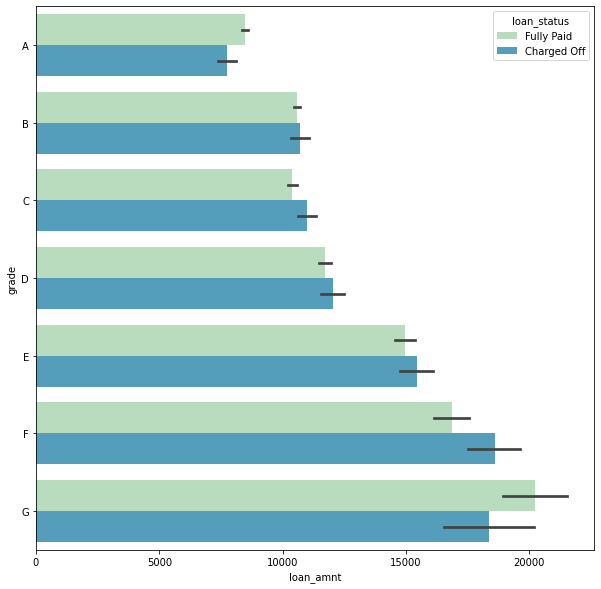

In [221]:
#Loan amount vs Grade
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='grade', hue ='loan_status',palette="GnBu", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

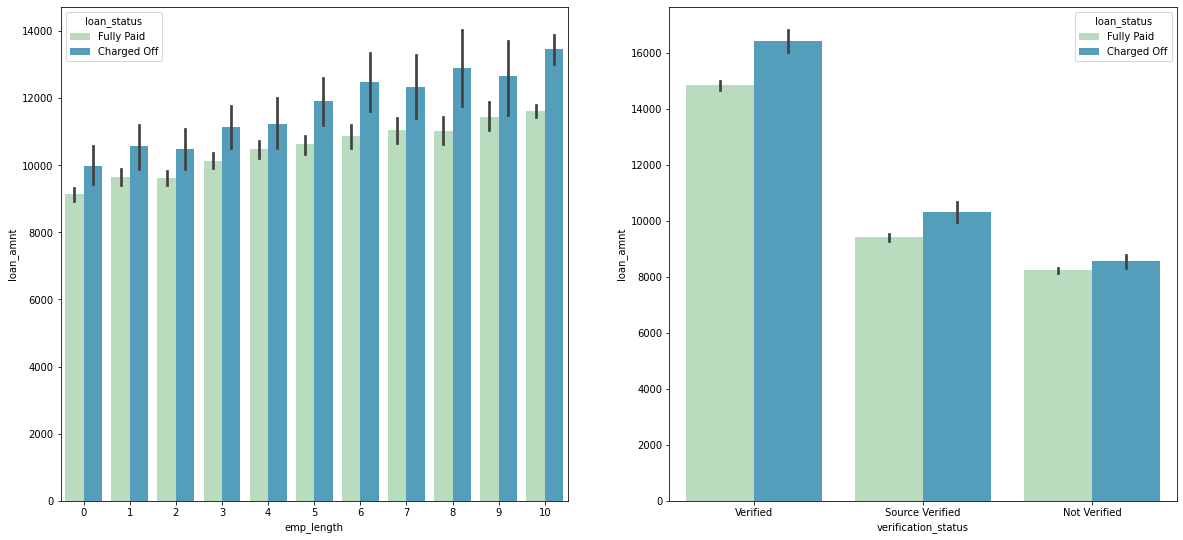

In [222]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan,y='loan_amnt', x='emp_length', hue ='loan_status',palette="GnBu")
plt.subplot(222)
sns.barplot(data =loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="GnBu")

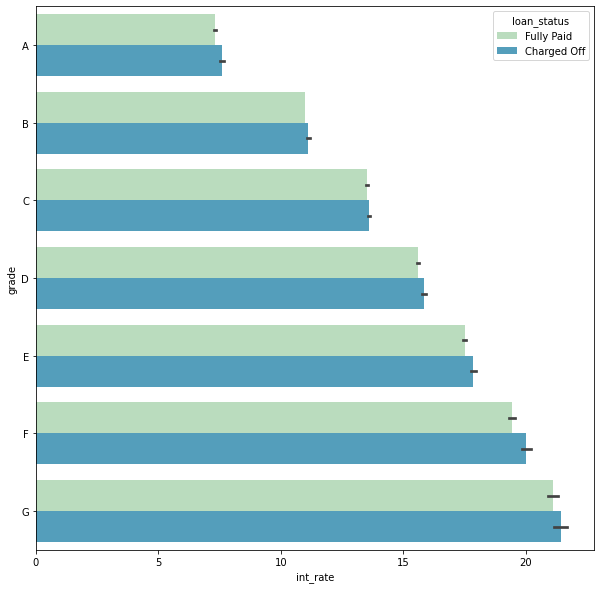

In [223]:
#grade vs interest rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate', y='grade', hue ='loan_status',palette="GnBu", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 432x288 with 0 Axes>

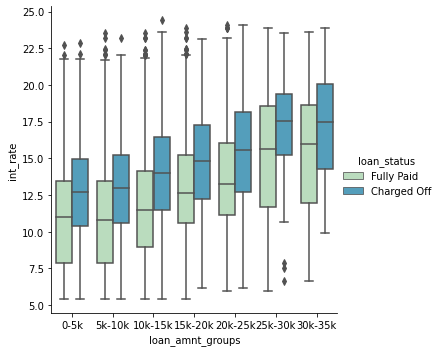

In [224]:
plt.tight_layout()
sns.catplot(data =loan,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="GnBu",kind = 'box')

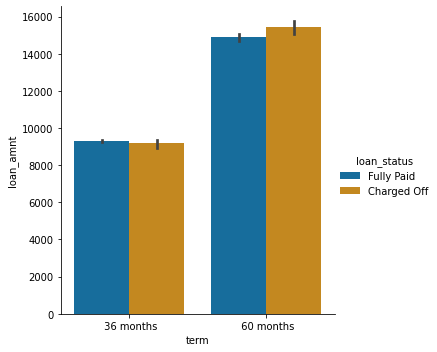

In [225]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')

# **Observations**

The above analysis with respect to the charged off loans.There is a more probability of defaulting when :
*   Applicants taking loan for 'home improvement' and have income of 60k -70k
*   Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
*   Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
*  Applicants who have taken a loan for small business and the loan amount is greater than 14k
*  Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
*   When grade is F and loan amount is between 15k-20k
*   For grade G and interest rate above 20%
*   Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
*   When the loan is verified and loan amount is above 16k
*   When employment length is 10yrs and loan amount is 12k-14k
